## Conexion a la API de IBM Watson

In [129]:
nlu_apikey = "rEtSCvVcgGzc0J52bopcij525C2VBT5aOa2L2Qn4Y8-o"
nlu_url = "https://api.eu-de.natural-language-understanding.watson.cloud.ibm.com/instances/fba99f47-a59f-43b1-b9b3-cf2b89e046cf"

### CREDENCIALES API IBM - MARIO
{ \
  "apikey": "rEtSCvVcgGzc0J52bopcij525C2VBT5aOa2L2Qn4Y8-o", \
  "iam_apikey_description": "Auto-generated for key 2c8ee236-7b25-4d41-b0d5-b6f628a882c4", \
  "iam_apikey_name": "Auto-generated service credentials", \
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Manager", \
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/c1eefd8c53d94ef180c679051a5b025c::serviceid:ServiceId-b6d2b06c-54cf-4fb1-9767-2113be5f6240", \
  "url": "https://api.eu-de.natural-language-understanding.watson.cloud.ibm.com/instances/fba99f47-a59f-43b1-b9b3-cf2b89e046cf" \
}

In [189]:
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, CategoriesOptions, ConceptsOptions, EmotionOptions, EntitiesOptions, KeywordsOptions, RelationsOptions, SentimentOptions

authenticator = IAMAuthenticator(nlu_apikey)
natural_language_undestanding = NaturalLanguageUnderstandingV1(
    version = '2020-08-01', 
    authenticator = authenticator
)
natural_language_undestanding.set_service_url(nlu_url)

## Importar dataset

In [177]:
import pandas as pd
dataset = pd.read_csv('../Procesamiento_Datos/full-data.csv')

In [178]:
dataset

,Unnamed: 0,Unnamed: 0.1,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,...,hashtags_text,hastags_indices,hastags_in_tweet,possitivity_textblob,possitivity_vader,possitivity_ibm,sentiment_mean,sentiment_norm,sentiment,categories
0,0,0,@Uber_Support hi guys why all my trips this we...,Wed Aug 11,09:43:42,9,Si,1,0,NaN,...,[],[],0,0.000000,0.0000,-0.912398,-0.304133,0.347934,Negativo,"[{'score': 0.693098, 'label': '/travel/special..."
1,1,1,So are we getting Uber eats league 1 or not @S...,Wed Aug 11,09:43:39,9,No,0,0,NaN,...,[],[],0,0.000000,0.0000,0.000000,0.000000,0.500000,Neutro,"[{'score': 0.59693, 'label': '/sports/baseball..."
2,2,2,"@footballdaily 2-3 years of Messi, a bit of ca...",Wed Aug 11,09:43:36,9,No,0,0,NaN,...,[],[],0,-0.333333,0.5859,-0.807459,-0.184964,0.407518,Neutro,"[{'score': 0.785107, 'label': '/sports/soccer'}]"
3,3,3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,Wed Aug 11,09:43:36,9,No,0,0,NaN,...,[],[],0,0.455000,0.4754,0.863584,0.597995,0.798997,Positivo,"[{'score': 0.685688, 'label': '/science/mathem..."
4,4,4,"Uber's Gopuff partnership, Drizly deal being p...",Wed Aug 11,09:43:33,9,No,0,0,NaN,...,[],[],0,0.000000,0.0000,-0.788377,-0.262792,0.368604,Negativo,"[{'score': 0.778195, 'label': '/news'}, {'scor..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7804,7804,7804,"Over 3,800 rides in over 3.5 years one blown t...",Mon Aug 09,13:01:33,13,No,0,0,NaN,...,[],[],0,0.000000,0.4898,-0.911314,-0.140505,0.429748,Neutro,"[{'score': 0.998438, 'label': '/automotive and..."
7805,7805,7805,@CoolABADev obviously i will want Messi to suc...,Mon Aug 09,13:01:27,13,No,0,1,NaN,...,[],[],0,0.114286,-0.0333,-0.759793,-0.226269,0.386865,Negativo,"[{'score': 0.780402, 'label': '/sports/soccer'}]"
7806,7806,7806,"@catekitchen Shit, that’s absolutely a crap si...",Mon Aug 09,13:01:24,13,No,0,2,NaN,...,[],[],0,-0.250000,-0.7086,-0.988080,-0.648893,0.175553,Muy Negativo,"[{'score': 0.841392, 'label': '/automotive and..."
7807,7807,7807,Simply don’t take a Uber then dumb ass https:/...,Mon Aug 09,13:00:56,13,No,0,0,NaN,...,[],[],0,-0.187500,-0.8096,-0.971243,-0.656114,0.171943,Muy Negativo,"[{'score': 0.60174, 'label': '/art and enterta..."


In [179]:
dataset.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace=True)

In [ ]:
dataset.head()

,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,user_id,user_name,...,status_count,hashtags_text,hastags_indices,hastags_in_tweet,possitivity_textblob,possitivity_vader,possitivity_ibm,sentiment_mean,sentiment_norm,sentiment
0,@Uber_Support hi guys why all my trips this we...,Wed Aug 11,09:43:42,9,Si,1,0,NaN,1137383922843771008,ShieldVoC,...,695888,[],[],0,0.000000,0.0000,-0.912398,-0.304133,0.347934,Negativo
1,So are we getting Uber eats league 1 or not @S...,Wed Aug 11,09:43:39,9,No,0,0,NaN,528288653,__Soini,...,58398,[],[],0,0.000000,0.0000,0.000000,0.000000,0.500000,Neutro
2,"@footballdaily 2-3 years of Messi, a bit of ca...",Wed Aug 11,09:43:36,9,No,0,0,NaN,826917817,ASHJY97,...,5974,[],[],0,-0.333333,0.5859,-0.807459,-0.184964,0.407518,Neutro
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,Wed Aug 11,09:43:36,9,No,0,0,NaN,1382729072837479936,GurmeetSinghSh6,...,169,[],[],0,0.455000,0.4754,0.863584,0.597995,0.798997,Positivo
4,"Uber's Gopuff partnership, Drizly deal being p...",Wed Aug 11,09:43:33,9,No,0,0,NaN,3646985662,sbwcws,...,113083,[],[],0,0.000000,0.0000,-0.788377,-0.262792,0.368604,Negativo


## Obtención del topic

In [ ]:
def topic_ibm(tweet):
  
  try: 
    aux = natural_language_undestanding.analyze(text=tweet, features=Features(categories=CategoriesOptions())).get_result()['categories']
    return aux
  
  except:
    return 'Not Applicable'

In [ ]:
dataset['categories'] = dataset['text'].apply(lambda x: topic_ibm(x))

In [ ]:
dataset.head()

,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,user_id,user_name,...,hashtags_text,hastags_indices,hastags_in_tweet,possitivity_textblob,possitivity_vader,possitivity_ibm,sentiment_mean,sentiment_norm,sentiment,categories
0,@Uber_Support hi guys why all my trips this we...,Wed Aug 11,09:43:42,9,Si,1,0,NaN,1137383922843771008,ShieldVoC,...,[],[],0,0.000000,0.0000,-0.912398,-0.304133,0.347934,Negativo,"[{'score': 0.693098, 'label': '/travel/special..."
1,So are we getting Uber eats league 1 or not @S...,Wed Aug 11,09:43:39,9,No,0,0,NaN,528288653,__Soini,...,[],[],0,0.000000,0.0000,0.000000,0.000000,0.500000,Neutro,"[{'score': 0.59693, 'label': '/sports/baseball..."
2,"@footballdaily 2-3 years of Messi, a bit of ca...",Wed Aug 11,09:43:36,9,No,0,0,NaN,826917817,ASHJY97,...,[],[],0,-0.333333,0.5859,-0.807459,-0.184964,0.407518,Neutro,"[{'score': 0.785107, 'label': '/sports/soccer'}]"
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,Wed Aug 11,09:43:36,9,No,0,0,NaN,1382729072837479936,GurmeetSinghSh6,...,[],[],0,0.455000,0.4754,0.863584,0.597995,0.798997,Positivo,"[{'score': 0.685688, 'label': '/science/mathem..."
4,"Uber's Gopuff partnership, Drizly deal being p...",Wed Aug 11,09:43:33,9,No,0,0,NaN,3646985662,sbwcws,...,[],[],0,0.000000,0.0000,-0.788377,-0.262792,0.368604,Negativo,"[{'score': 0.778195, 'label': '/news'}, {'scor..."


In [ ]:
for i in dataset['categories'][7500]:
    print(i)

{'score': 0.618347, 'label': '/business and industrial/business software'}
{'score': 0.605689, 'label': '/technology and computing/operating systems'}
{'score': 0.58508, 'label': '/technology and computing/enterprise technology'}


### Guardar nuevo DataFrame

In [170]:
dataset.to_csv('full-data.csv')

## Feature Engineering con 'categories'

In [70]:
import pandas as pd
dataset = pd.read_csv('full-data.csv')

La variable 'categories' es una lista pero al guardarse en csv, se convierte a string. Al volverlo importar, ya no podemos trabajar con ello como si fuera una lista. Para solucionarlo hay que usar la función ast.literal_eval(). Aplicarla directamente no funcionaria puesto que en algunos tweets tenemos 'Not Applicable' en lugar de una lista. Por ello se crea la siguiente función:

In [90]:
def string_to_list(string):
    from ast import literal_eval
    try:
        x = literal_eval(string)
    except:
        x = 'Not Applicable'
    return x

In [10]:
dataset['categories'] = dataset['categories'].apply(string_to_list)

In [153]:
dataset['categories'][4]

[{'score': 0.778195, 'label': '/news'},
 {'score': 0.647092,
  'label': '/business and industrial/advertising and marketing'},
 {'score': 0.609852,
  'label': '/business and industrial/advertising and marketing/advertising'}]

In [11]:
for cat in dataset['categories'][:20]:
    print(cat)

[{'score': 0.693098, 'label': '/travel/specialty travel/adventure travel'}, {'score': 0.599703, 'label': '/travel/business travel'}, {'score': 0.579002, 'label': '/automotive and vehicles'}]
[{'score': 0.59693, 'label': '/sports/baseball'}, {'score': 0.591677, 'label': '/food and drink'}, {'score': 0.560498, 'label': '/pets/large animals'}]
[{'score': 0.785107, 'label': '/sports/soccer'}]
[{'score': 0.685688, 'label': '/science/mathematics/arithmetic'}, {'score': 0.602089, 'label': '/art and entertainment/shows and events'}, {'score': 0.574684, 'label': '/style and fashion/body art'}]
[{'score': 0.778195, 'label': '/news'}, {'score': 0.647092, 'label': '/business and industrial/advertising and marketing'}, {'score': 0.609852, 'label': '/business and industrial/advertising and marketing/advertising'}]
[{'score': 0.694885, 'label': '/society/crime/sexual offense/rape'}, {'score': 0.671184, 'label': '/society/crime/personal offense'}, {'score': 0.661246, 'label': '/society/crime/personal 

#### Opcion 1
Nos quedamos con la primera etiqueta de la categoría con más score. Cada tweet tendrá una única etiqueta de topic.\
\
**Ej.** [{'score': 0.693098, 'label': '/travel/specialty travel/adventure travel'}, {'score': 0.599703, 'label': '/travel/business travel'}, {'score': 0.579002, 'label': '/automotive and vehicles'}]\
--> **Nos quedamos con 'travel'**

In [12]:
#Hacemos una copia del dataset original para trabajar con esta opcion
dataset_1 = dataset[:100]


In [13]:
def get_topic_1(categories):
    x = categories[0]['label']
    return x.split('/')[1]

In [14]:
dataset_1['topic']=dataset_1['categories'].apply(lambda x: get_topic_1(x))

<ipython-input-14-ca83377ebd66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_1['topic']=dataset_1['categories'].apply(lambda x: get_topic_1(x))


In [15]:
dataset_1[['text', 'categories', 'topic']].head()

,text,categories,topic
0,@Uber_Support hi guys why all my trips this we...,"[{'score': 0.693098, 'label': '/travel/special...",travel
1,So are we getting Uber eats league 1 or not @S...,"[{'score': 0.59693, 'label': '/sports/baseball...",sports
2,"@footballdaily 2-3 years of Messi, a bit of ca...","[{'score': 0.785107, 'label': '/sports/soccer'}]",sports
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,"[{'score': 0.685688, 'label': '/science/mathem...",science
4,"Uber's Gopuff partnership, Drizly deal being p...","[{'score': 0.778195, 'label': '/news'}, {'scor...",news


#### Opcion 2
Nos quedamos con la primera etiqueta de cada categoría. \
\
**Ej.** [{'score': 0.693098, 'label': '/travel/specialty travel/adventure travel'}, {'score': 0.599703, 'label': '/travel/business travel'}, {'score': 0.579002, 'label': '/automotive and vehicles'}]\
--> **Nos quedamos con 'travel', 'travel' y 'automotive and vehicles** (luego eliminamos duplicados)

In [46]:
#Hacemos una copia del dataset original para trabajar con esta opcion
dataset_2 = dataset[:100]

In [47]:
def get_topic_2(categories):
    labels = []
    for category in categories:
        x = category['label'].split('/')
        labels.append(x[1])
    return list(set(labels))

In [48]:
dataset_2['topics']=dataset_2['categories'].apply(lambda x: get_topic_2(x))

<ipython-input-48-f6ef7e5265d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2['topics']=dataset_2['categories'].apply(lambda x: get_topic_2(x))


In [49]:
dataset_2[['text', 'categories', 'topics']].head()

,text,categories,topics
0,@Uber_Support hi guys why all my trips this we...,"[{'score': 0.693098, 'label': '/travel/special...","[travel, automotive and vehicles]"
1,So are we getting Uber eats league 1 or not @S...,"[{'score': 0.59693, 'label': '/sports/baseball...","[sports, pets, food and drink]"
2,"@footballdaily 2-3 years of Messi, a bit of ca...","[{'score': 0.785107, 'label': '/sports/soccer'}]",[sports]
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,"[{'score': 0.685688, 'label': '/science/mathem...","[art and entertainment, style and fashion, sci..."
4,"Uber's Gopuff partnership, Drizly deal being p...","[{'score': 0.778195, 'label': '/news'}, {'scor...","[news, business and industrial]"


A continuacion, creamos una variable por cada una de las etiquetas en 'topics', es decir, 'topic_1', 'topic_2' y 'topic_3'

In [59]:
def desagregar_topics(lista_topics, n_topic):
    try:
        topic = lista_topics[n_topic-1]
    except:
        topic = 'NA'
    return topic

In [99]:
dataset_2['topic_1'] = dataset_2['topics'].apply(lambda x: desagregar_topics(x, 1))
dataset_2['topic_2'] = dataset_2['topics'].apply(lambda x: desagregar_topics(x, 2))
dataset_2['topic_3'] = dataset_2['topics'].apply(lambda x: desagregar_topics(x, 3))

<ipython-input-99-63b6f2d20988>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2['topic_1'] = dataset_2['topics'].apply(lambda x: desagregar_topics(x, 1))
<ipython-input-99-63b6f2d20988>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2['topic_2'] = dataset_2['topics'].apply(lambda x: desagregar_topics(x, 2))
<ipython-input-99-63b6f2d20988>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [100]:
dataset_2[['text', 'categories', 'topics', 'topic_1', 'topic_2', 'topic_3']].head()

,text,categories,topics,topic_1,topic_2,topic_3
0,@Uber_Support hi guys why all my trips this we...,"[{'score': 0.693098, 'label': '/travel/special...","[travel, automotive and vehicles]",travel,automotive and vehicles,NA
1,So are we getting Uber eats league 1 or not @S...,"[{'score': 0.59693, 'label': '/sports/baseball...","[food and drink, sports, pets]",food and drink,sports,pets
2,"@footballdaily 2-3 years of Messi, a bit of ca...","[{'score': 0.785107, 'label': '/sports/soccer'}]",[sports],sports,NA,NA
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,"[{'score': 0.685688, 'label': '/science/mathem...","[science, art and entertainment, style and fas...",science,art and entertainment,style and fashion
4,"Uber's Gopuff partnership, Drizly deal being p...","[{'score': 0.778195, 'label': '/news'}, {'scor...","[business and industrial, news]",business and industrial,news,NA


#### Opcion 3
Nos quedamos con todas las etiquetas de la primera categoría. \
\
**Ej.** [{'score': 0.693098, 'label': '/travel/specialty travel/adventure travel'}, {'score': 0.599703, 'label': '/travel/business travel'}, {'score': 0.579002, 'label': '/automotive and vehicles'}]\
--> **Nos quedamos con 'travel', 'specialty travel', 'adventure travel'**\
En este caso, debemos tener tantas columnas como el número máximo de etiquetas en una fila

In [103]:
dataset_3 = dataset[:100]

In [168]:
dataset_3['categories'][0][0]['label']

'/travel/specialty travel/adventure travel'

In [104]:
def get_topic_3(categories):
    x = categories[0]['label']
    x = x.split('/')
    x.remove('')
    return x

In [105]:
dataset_3['topics']=dataset_3['categories'].apply(lambda x: get_topic_3(x))

<ipython-input-105-c40aaccecc86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_3['topics']=dataset_3['categories'].apply(lambda x: get_topic_3(x))


In [108]:
dataset_3['topic_1'] = dataset_3['topics'].apply(lambda x: desagregar_topics(x, 1))
dataset_3['topic_2'] = dataset_3['topics'].apply(lambda x: desagregar_topics(x, 2))
dataset_3['topic_3'] = dataset_3['topics'].apply(lambda x: desagregar_topics(x, 3))

<ipython-input-108-98f2389c8cf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_3['topic_1'] = dataset_3['topics'].apply(lambda x: desagregar_topics(x, 1))
<ipython-input-108-98f2389c8cf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_3['topic_2'] = dataset_3['topics'].apply(lambda x: desagregar_topics(x, 2))
<ipython-input-108-98f2389c8cf2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [109]:
dataset_3[['text', 'categories', 'topics', 'topic_1', 'topic_2', 'topic_3']].head()

,text,categories,topics,topic_1,topic_2,topic_3
0,@Uber_Support hi guys why all my trips this we...,"[{'score': 0.693098, 'label': '/travel/special...","[travel, specialty travel, adventure travel]",travel,specialty travel,adventure travel
1,So are we getting Uber eats league 1 or not @S...,"[{'score': 0.59693, 'label': '/sports/baseball...","[sports, baseball]",sports,baseball,NA
2,"@footballdaily 2-3 years of Messi, a bit of ca...","[{'score': 0.785107, 'label': '/sports/soccer'}]","[sports, soccer]",sports,soccer,NA
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,"[{'score': 0.685688, 'label': '/science/mathem...","[science, mathematics, arithmetic]",science,mathematics,arithmetic
4,"Uber's Gopuff partnership, Drizly deal being p...","[{'score': 0.778195, 'label': '/news'}, {'scor...",[news],news,NA,NA


#### Opcion 4
Nos quedamos con todas las etiquetas de cada categoría. \
\
**Ej.** [{'score': 0.693098, 'label': '/travel/specialty travel/adventure travel'}, {'score': 0.599703, 'label': '/travel/business travel'}, {'score': 0.579002, 'label': '/automotive and vehicles'}]\
--> **Nos quedamos con 'travel', 'specialty travel', 'adventure travel', 'travel', 'business travel' 'automotive and vehicles'** (luego eliminamos duplicados)\
En este caso, debemos tener tantas columnas como el número máximo de etiquetas en una fila

In [64]:
#Hacemos una copia del dataset original para trabajar con esta opcion
dataset_4 = dataset[:100]

In [65]:
def get_topic_4(categories):
    labels = []
    for category in categories:
        x = category['label'].split('/')[1:]
        for label in x:
            labels.append(label)
    return list(set(labels))

In [66]:
dataset_4['topics']=dataset_4['categories'].apply(lambda x: get_topic_4(x))

<ipython-input-66-3741494a7115>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_4['topics']=dataset_4['categories'].apply(lambda x: get_topic_4(x))


In [67]:
#calculo numero máximo de etiquetas
n_max = 0

for i in dataset_4['topics']:
    n_max = max(n_max, len(i))

print(n_max)

9


Crear una columna por cada topic:

In [68]:
for i in range(n_max):
    n = i+1
    feature_name = 'topic_'+str(n)
    dataset_4[feature_name] = dataset_4['topics'].apply(lambda x: desagregar_topics(x, n))

<ipython-input-68-b7b3c4724b36>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_4[feature_name] = dataset_4['topics'].apply(lambda x: desagregar_topics(x, n))


In [69]:
dataset_4.head()

,Unnamed: 0,Unnamed: 0.1,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,...,topics,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0,0,@Uber_Support hi guys why all my trips this we...,Wed Aug 11,09:43:42,9,Si,1,0,NaN,...,"[travel, business travel, specialty travel, au...",travel,business travel,specialty travel,automotive and vehicles,adventure travel,NA,NA,NA,NA
1,1,1,So are we getting Uber eats league 1 or not @S...,Wed Aug 11,09:43:39,9,No,0,0,NaN,...,"[large animals, baseball, sports, pets, food a...",large animals,baseball,sports,pets,food and drink,NA,NA,NA,NA
2,2,2,"@footballdaily 2-3 years of Messi, a bit of ca...",Wed Aug 11,09:43:36,9,No,0,0,NaN,...,"[sports, soccer]",sports,soccer,NA,NA,NA,NA,NA,NA,NA
3,3,3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,Wed Aug 11,09:43:36,9,No,0,0,NaN,...,"[body art, style and fashion, science, shows a...",body art,style and fashion,science,shows and events,mathematics,arithmetic,art and entertainment,NA,NA
4,4,4,"Uber's Gopuff partnership, Drizly deal being p...",Wed Aug 11,09:43:33,9,No,0,0,NaN,...,"[advertising, advertising and marketing, news,...",advertising,advertising and marketing,news,business and industrial,NA,NA,NA,NA,NA


Seleccionamos Opcion3 --> Nos quedamos con todas las etiquetas de la primera categoría

### Generar dataset definitivo

In [91]:
dataset = pd.read_csv('full-data.csv')
dataset['categories'] = dataset['categories'].apply(string_to_list)

In [92]:
dataset.head()

,Unnamed: 0,Unnamed: 0.1,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,...,hashtags_text,hastags_indices,hastags_in_tweet,possitivity_textblob,possitivity_vader,possitivity_ibm,sentiment_mean,sentiment_norm,sentiment,categories
0,0,0,@Uber_Support hi guys why all my trips this we...,Wed Aug 11,09:43:42,9,Si,1,0,NaN,...,[],[],0,0.000000,0.0000,-0.912398,-0.304133,0.347934,Negativo,"[{'score': 0.693098, 'label': '/travel/special..."
1,1,1,So are we getting Uber eats league 1 or not @S...,Wed Aug 11,09:43:39,9,No,0,0,NaN,...,[],[],0,0.000000,0.0000,0.000000,0.000000,0.500000,Neutro,"[{'score': 0.59693, 'label': '/sports/baseball..."
2,2,2,"@footballdaily 2-3 years of Messi, a bit of ca...",Wed Aug 11,09:43:36,9,No,0,0,NaN,...,[],[],0,-0.333333,0.5859,-0.807459,-0.184964,0.407518,Neutro,"[{'score': 0.785107, 'label': '/sports/soccer'}]"
3,3,3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,Wed Aug 11,09:43:36,9,No,0,0,NaN,...,[],[],0,0.455000,0.4754,0.863584,0.597995,0.798997,Positivo,"[{'score': 0.685688, 'label': '/science/mathem..."
4,4,4,"Uber's Gopuff partnership, Drizly deal being p...",Wed Aug 11,09:43:33,9,No,0,0,NaN,...,[],[],0,0.000000,0.0000,-0.788377,-0.262792,0.368604,Negativo,"[{'score': 0.778195, 'label': '/news'}, {'scor..."


Eliminar columnas generadas por csv --> 'Unnamed: 0' y 'Unnamed: 0.1'

In [93]:
dataset.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

**¿Cuántos 'Not Applicable' en la columna categories?** \
Categorías con 'Not Applicable' son aquellas donde el modelo no ha determinado nada para ese tweet

In [94]:
dataset[dataset['categories'] == 'Not Applicable'][['text', 'categories']]

,text,categories
381,!■!●!!!●£15 OFF UBER EATS FIRST ORDER! USE PRO...,Not Applicable
835,@Uber_India utterly disgusted with yr driver p...,Not Applicable
1589,Newly UPDATED BWF Badminton Tournament 2021 Ca...,Not Applicable
1994,Someone tell me not to uber eats sushi to my h...,Not Applicable
2175,Absolutely THRILLED to be working again with m...,Not Applicable
2499,Joined @ioNOddities !,Not Applicable
2595,Not Uber eats having “stories”,Not Applicable
2966,Just in case you’ve been following along and w...,Not Applicable
3246,Gosh my nipples are itchy today.,Not Applicable
4454,@OX_Bigly Thanks for reaching out. We've been ...,Not Applicable


Estos 13 casos darán problemas al extraer los topics porque la función considera que esta variable es de tipo lista y estos 13 casos son string. Por ello modificamos la función con un 'try-except' para contemplar estos casos:

In [95]:
def get_topic_3(categories):
    try:
        x = categories[0]['label']
        x = x.split('/')
        x.remove('')
    except:
        x = 'Not Applicable'
    return x

A continuación, hacemos las mismas operaciones que en el apartado Opcion3 para el dataset completo

In [96]:
dataset['topics']=dataset['categories'].apply(lambda x: get_topic_3(x))

In [99]:
for i in range(3):
    n = i+1
    feature_name = 'topic_'+str(n)
    dataset[feature_name] = dataset['topics'].apply(lambda x: desagregar_topics(x, n))

In [103]:
#Eliminar columna 'topic', ya no es necesaria
dataset.drop(['topics'], axis=1, inplace=True)

#categories probablemente habría que eliminarla también. La dejamos de momento por si acaso

In [104]:
dataset.head()

,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,user_id,user_name,...,possitivity_textblob,possitivity_vader,possitivity_ibm,sentiment_mean,sentiment_norm,sentiment,categories,topic_1,topic_2,topic_3
0,@Uber_Support hi guys why all my trips this we...,Wed Aug 11,09:43:42,9,Si,1,0,NaN,1137383922843771008,ShieldVoC,...,0.000000,0.0000,-0.912398,-0.304133,0.347934,Negativo,"[{'score': 0.693098, 'label': '/travel/special...",travel,specialty travel,adventure travel
1,So are we getting Uber eats league 1 or not @S...,Wed Aug 11,09:43:39,9,No,0,0,NaN,528288653,__Soini,...,0.000000,0.0000,0.000000,0.000000,0.500000,Neutro,"[{'score': 0.59693, 'label': '/sports/baseball...",sports,baseball,NA
2,"@footballdaily 2-3 years of Messi, a bit of ca...",Wed Aug 11,09:43:36,9,No,0,0,NaN,826917817,ASHJY97,...,-0.333333,0.5859,-0.807459,-0.184964,0.407518,Neutro,"[{'score': 0.785107, 'label': '/sports/soccer'}]",sports,soccer,NA
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,Wed Aug 11,09:43:36,9,No,0,0,NaN,1382729072837479936,GurmeetSinghSh6,...,0.455000,0.4754,0.863584,0.597995,0.798997,Positivo,"[{'score': 0.685688, 'label': '/science/mathem...",science,mathematics,arithmetic
4,"Uber's Gopuff partnership, Drizly deal being p...",Wed Aug 11,09:43:33,9,No,0,0,NaN,3646985662,sbwcws,...,0.000000,0.0000,-0.788377,-0.262792,0.368604,Negativo,"[{'score': 0.778195, 'label': '/news'}, {'scor...",news,NA,NA


In [105]:
dataset.to_csv('full-data.csv')

## EDA Topics

In [107]:
topics = dataset[['topic_1', 'topic_2', 'topic_3']]

¿Cuántas categorías diferentes?

In [113]:
t2 = topics[:10]
t2

,topic_1,topic_2,topic_3
0,travel,specialty travel,adventure travel
1,sports,baseball,NA
2,sports,soccer,NA
3,science,mathematics,arithmetic
4,news,NA,NA
5,society,crime,sexual offense
6,society,unrest and war,NA
7,sports,soccer,NA
8,family and parenting,babies and toddlers,baby clothes
9,automotive and vehicles,motorcycles,NA


In [149]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.5)
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8'})

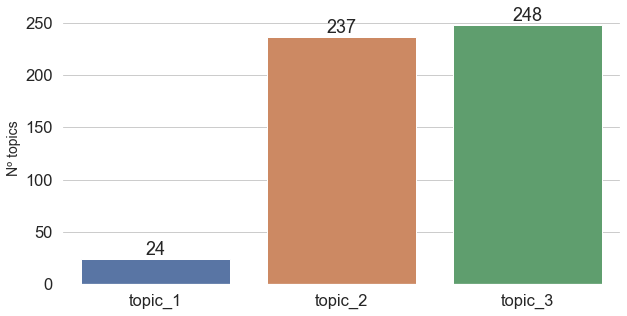

In [150]:
splot = sns.barplot(x=list(topics.columns), y=topics.nunique())

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
                   
plt.ylabel("Nº topics", size=14)
plt.show()

In [156]:
topics['topic_1'].value_counts()

automotive and vehicles      2228
technology and computing     1014
food and drink                586
sports                        566
society                       557
art and entertainment         528
business and industrial       467
law, govt and politics        332
finance                       292
travel                        205
health and fitness            195
family and parenting          152
style and fashion             104
real estate                    99
pets                           91
science                        85
education                      80
religion and spirituality      61
shopping                       41
news                           40
careers                        34
N                              27
hobbies and interests          24
home and garden                 1
Name: topic_1, dtype: int64

Subtopics de **automotive and vehicles**

In [211]:
topics_df = pd.DataFrame(topics.value_counts())
topics_df.reset_index(inplace=True)
topics_df.rename(columns={0: 'Frequency'})

,topic_1,topic_2,topic_3,Frequency
0,automotive and vehicles,cars,car culture,749
1,automotive and vehicles,vehicle rental,NA,375
2,food and drink,NA,NA,287
3,technology and computing,internet technology,social network,265
4,technology and computing,tech news,NA,224
...,...,...,...,...
482,art and entertainment,music,NA,1
483,home and garden,appliances,dishwashers,1
484,hobbies and interests,paranormal phenomena,occult,1
485,hobbies and interests,needlework,NA,1


In [222]:
topics_df[topics_df['topic_1']=='technology and computing']

,topic_1,topic_2,topic_3,0
3,technology and computing,internet technology,social network,265
4,technology and computing,tech news,NA,224
6,technology and computing,internet technology,email,211
32,technology and computing,hardware,computer components,48
33,technology and computing,programming languages,c and c++,47
38,technology and computing,internet technology,NA,40
46,technology and computing,internet technology,web search,35
86,technology and computing,operating systems,NA,20
106,technology and computing,hardware,computer,14
109,technology and computing,hardware,computer peripherals,14


In [220]:
def find_tweets_by_topic(topic1):
    print("Tweets talking about {} \n\n".format(topic1))
    for tweet in dataset[dataset[topic_1==topic1]]['text']:
                



0       automotive and vehicles
1       automotive and vehicles
2                food and drink
3      technology and computing
4      technology and computing
                 ...           
482       art and entertainment
483             home and garden
484       hobbies and interests
485       hobbies and interests
486     business and industrial
Name: topic_1, Length: 487, dtype: object

In [224]:
dataset.head()

,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,user_id,user_name,...,possitivity_textblob,possitivity_vader,possitivity_ibm,sentiment_mean,sentiment_norm,sentiment,categories,topic_1,topic_2,topic_3
0,@Uber_Support hi guys why all my trips this we...,Wed Aug 11,09:43:42,9,Si,1,0,NaN,1137383922843771008,ShieldVoC,...,0.000000,0.0000,-0.912398,-0.304133,0.347934,Negativo,"[{'score': 0.693098, 'label': '/travel/special...",travel,specialty travel,adventure travel
1,So are we getting Uber eats league 1 or not @S...,Wed Aug 11,09:43:39,9,No,0,0,NaN,528288653,__Soini,...,0.000000,0.0000,0.000000,0.000000,0.500000,Neutro,"[{'score': 0.59693, 'label': '/sports/baseball...",sports,baseball,NA
2,"@footballdaily 2-3 years of Messi, a bit of ca...",Wed Aug 11,09:43:36,9,No,0,0,NaN,826917817,ASHJY97,...,-0.333333,0.5859,-0.807459,-0.184964,0.407518,Neutro,"[{'score': 0.785107, 'label': '/sports/soccer'}]",sports,soccer,NA
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,Wed Aug 11,09:43:36,9,No,0,0,NaN,1382729072837479936,GurmeetSinghSh6,...,0.455000,0.4754,0.863584,0.597995,0.798997,Positivo,"[{'score': 0.685688, 'label': '/science/mathem...",science,mathematics,arithmetic
4,"Uber's Gopuff partnership, Drizly deal being p...",Wed Aug 11,09:43:33,9,No,0,0,NaN,3646985662,sbwcws,...,0.000000,0.0000,-0.788377,-0.262792,0.368604,Negativo,"[{'score': 0.778195, 'label': '/news'}, {'scor...",news,NA,NA
